#LOAD DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/uji_Shams/Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORT LIBRARY

In [3]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import Input
from tensorflow.keras.layers import  MaxPooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, Add, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, Activation
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision,SensitivityAtSpecificity, SpecificityAtSensitivity, Metric, TruePositives,FalseNegatives, Recall
from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from keras.applications.vgg19 import preprocess_input
from sklearn.utils import shuffle, resample
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping, ModelCheckpoint,CSVLogger, ReduceLROnPlateau, LearningRateScheduler
import datetime
from sklearn.metrics import accuracy_score, classification_report
from keras import backend as K
import random
from sklearn.model_selection import train_test_split,  StratifiedShuffleSplit
!pip install pycm==3.1
%load_ext tensorboard
from pycm import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#LABELLING

In [4]:
df = None
for label in os.listdir(data_dir):
  data = []
  for img_filename in os.listdir(data_dir + '/' + label):
    filename, ext = os.path.splitext(img_filename)
    label_folder = os.path.join(data_dir, label)
    src_img_filepath = os.path.join(label_folder, img_filename)
    data.append(src_img_filepath)
  new_df = pd.DataFrame(data, columns=['path',])
  new_df['label'] = label
  df = pd.concat([df, new_df])
df

,path,label
0,/content/drive/MyDrive/uji_Shams/Dataset/Other...,Others
1,/content/drive/MyDrive/uji_Shams/Dataset/Other...,Others
2,/content/drive/MyDrive/uji_Shams/Dataset/Other...,Others
3,/content/drive/MyDrive/uji_Shams/Dataset/Other...,Others
4,/content/drive/MyDrive/uji_Shams/Dataset/Other...,Others
...,...,...
97,/content/drive/MyDrive/uji_Shams/Dataset/Monke...,Monkeypox
98,/content/drive/MyDrive/uji_Shams/Dataset/Monke...,Monkeypox
99,/content/drive/MyDrive/uji_Shams/Dataset/Monke...,Monkeypox
100,/content/drive/MyDrive/uji_Shams/Dataset/Monke...,Monkeypox


#SPLIT DATASET FOR CV

In [5]:
df_train_val, df_test = train_test_split(df, random_state=666, test_size=0.1 )
df_train_val.to_csv('/content/drive/MyDrive/uji_Shams/train_label.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/uji_Shams/test_label.csv', index=False)
image_size=(224, 224)

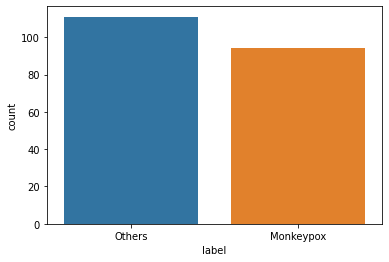

In [6]:
ax = sns.countplot(x="label", data=df_train_val,)
plt.show()

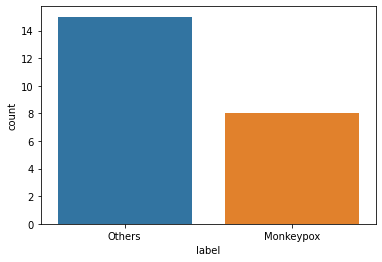

In [7]:
ax = sns.countplot(x="label", data=df_test,)
plt.show()

#IMPORT MODEL

In [8]:
model = keras.Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))

# Creating an output layer
model.add(Dense(units= 2, activation='softmax'))

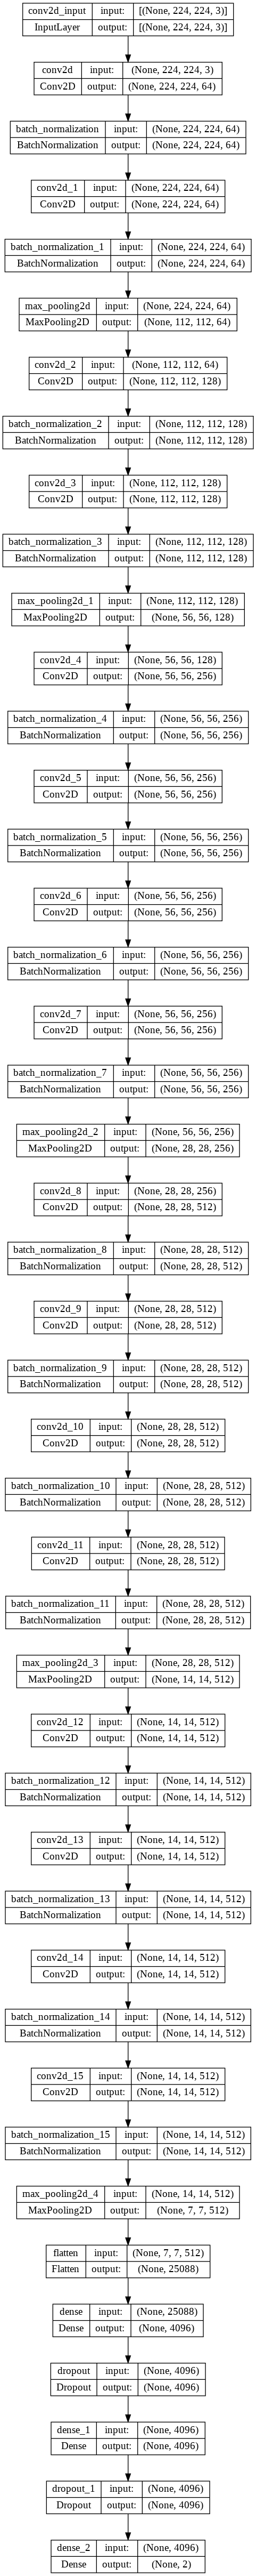

In [9]:
plot_model(model = model, show_shapes = True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

#PROSES AUGMENTASI DATA

In [11]:
datagen = ImageDataGenerator(rescale=1./255,)
train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val, 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 

class_names = train_generator.class_indices
print(class_names)
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  # print(image_batch[0].shape)
  # zz.fit(image_batch)
  break

Found 205 validated image filenames belonging to 2 classes.
{'Monkeypox': 0, 'Others': 1}
(32, 224, 224, 3)
(32, 2)


#PELATIHAN MODEL

In [12]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )

  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/uji_Shams/' +"Model/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_accuracy'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance')
  plt.ylabel('accuracy / loss')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy', 'train_loss', 'val_accuracy', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

#PENGUJIAN MODEL USING K-CV

##SKENARIO 1

In [22]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (184, 2)
val shape: (21, 2)
Found 184 validated image filenames belonging to 2 classes.
Found 21 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 4.5216 - accuracy: 0.4946
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_1_model.h5
6/6 [==============================] - 36s 6s/step - loss: 4.5216 - accuracy: 0.4946 - val_loss: 0.6840 - val_accuracy: 0.5714
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 7.4657 - accuracy: 0.5489
Epoch 2: val_accuracy did not improve from 0.57143
6/6 [==============================] - 4s 675ms/step - loss: 7.4657 - accuracy: 0.5489 - val_loss: 0.7097 - val_accuracy: 0.5714
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 3.9174 - accuracy: 0.5652
Epoch 3: val_accuracy did not improve from 0.57143
6/6 [==============================] - 5s 716ms/step - loss: 3.9174 - accuracy

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 473ms/step
Predict  0        1        
Actual
0        5        4        

1        2        10       





Overall Statistics : 

95% CI                                                            (0.52107,0.9075)
ACC Macro                                                         0.71429
ARI                                                               0.14449
AUNP                                                              0.69444
AUNU                                                              0.69444
Bangdiwala B                                                      0.54113
Bennett S                                                         0.42857
CBA                                                               0.63492
CSI                                                               0.40873
Chi-Squared                                                       3.5
Chi-Squared DF         

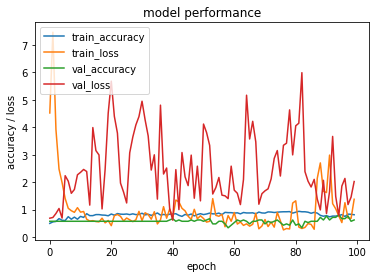

    epoch  accuracy      loss  val_accuracy  val_loss
94     94  0.777174  0.769416      0.809524  0.769766


In [23]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 2

In [24]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (184, 2)
val shape: (21, 2)
Found 184 validated image filenames belonging to 2 classes.
Found 21 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 2.5232 - accuracy: 0.6902
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_2_model.h5
6/6 [==============================] - 15s 2s/step - loss: 2.5232 - accuracy: 0.6902 - val_loss: 3.3915 - val_accuracy: 0.5714
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.3272 - accuracy: 0.7065
Epoch 2: val_accuracy did not improve from 0.57143
6/6 [==============================] - 4s 662ms/step - loss: 1.3272 - accuracy: 0.7065 - val_loss: 3.9393 - val_accuracy: 0.4762
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.1285 - accuracy: 0.7011
Epoch 3: val_accuracy improved from 0.57143 to 0.71429, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_2_model.h5
6

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 354ms/step
Predict  0        1        
Actual
0        9        0        

1        0        12       





Overall Statistics : 

95% CI                                                            (1.0,1.0)
ACC Macro                                                         1.0
ARI                                                               1.0
AUNP                                                              1.0
AUNU                                                              1.0
Bangdiwala B                                                      1.0
Bennett S                                                         1.0
CBA                                                               1.0
CSI                                                               1.0
Chi-Squared                                                       21.0
Chi-Squared DF                                               

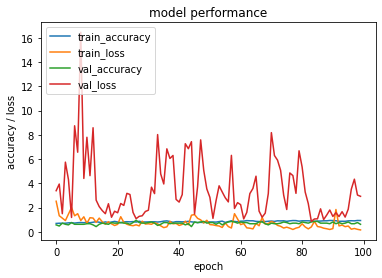

    epoch  accuracy      loss  val_accuracy  val_loss
26     26  0.804348  0.576445      0.952381  1.082521


In [25]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 2
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 3

In [40]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (184, 2)
val shape: (21, 2)
Found 184 validated image filenames belonging to 2 classes.
Found 21 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 7.4707 - accuracy: 0.5217
Epoch 1: val_accuracy improved from -inf to 0.52381, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_3_model.h5
6/6 [==============================] - 18s 2s/step - loss: 7.4707 - accuracy: 0.5217 - val_loss: 0.6928 - val_accuracy: 0.5238
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 2.7466 - accuracy: 0.5924
Epoch 2: val_accuracy did not improve from 0.52381
6/6 [==============================] - 4s 658ms/step - loss: 2.7466 - accuracy: 0.5924 - val_loss: 0.7093 - val_accuracy: 0.5238
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 2.3955 - accuracy: 0.5326
Epoch 3: val_accuracy did not improve from 0.52381
6/6 [==============================] - 4s 675ms/step - loss: 2.3955 - accuracy

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 406ms/step
Predict 0       1       
Actual
0       4       5       

1       3       9       





Overall Statistics : 

95% CI                                                            (0.41134,0.82675)
ACC Macro                                                         0.61905
ARI                                                               0.01141
AUNP                                                              0.59722
AUNU                                                              0.59722
Bangdiwala B                                                      0.41991
Bennett S                                                         0.2381
CBA                                                               0.54365
CSI                                                               0.20437
Chi-Squared                                                       0.875
Chi-Squared DF                

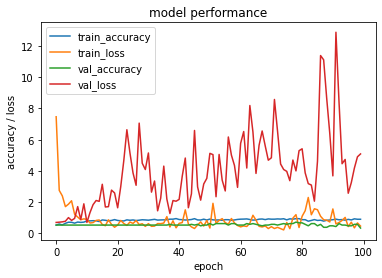

    epoch  accuracy      loss  val_accuracy  val_loss
78     78  0.934783  1.190211      0.714286  3.998468


In [41]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 3
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 4

In [42]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (184, 2)
val shape: (21, 2)
Found 184 validated image filenames belonging to 2 classes.
Found 21 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.4756 - accuracy: 0.7989
Epoch 1: val_accuracy improved from -inf to 0.52381, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_4_model.h5
6/6 [==============================] - 14s 2s/step - loss: 1.4756 - accuracy: 0.7989 - val_loss: 3.1212 - val_accuracy: 0.5238
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.8733 - accuracy: 0.8261
Epoch 2: val_accuracy did not improve from 0.52381
6/6 [==============================] - 4s 674ms/step - loss: 0.8733 - accuracy: 0.8261 - val_loss: 5.8541 - val_accuracy: 0.4762
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.2729 - accuracy: 0.7609
Epoch 3: val_accuracy did not improve from 0.52381
6/6 [==============================] - 5s 701ms/step - loss: 1.2729 - accuracy

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 404ms/step
Predict  0        1        
Actual
0        8        1        

1        1        11       





Overall Statistics : 

95% CI                                                            (0.77921,1.03031)
ACC Macro                                                         0.90476
ARI                                                               0.6378
AUNP                                                              0.90278
AUNU                                                              0.90278
Bangdiwala B                                                      0.82222
Bennett S                                                         0.80952
CBA                                                               0.90278
CSI                                                               0.80556
Chi-Squared                                                       13.62731
Chi-Squared DF    

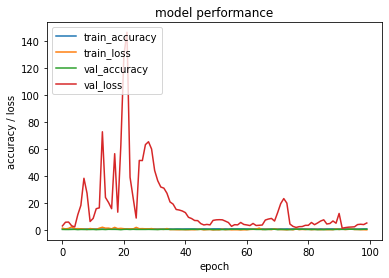

    epoch  accuracy      loss  val_accuracy  val_loss
76     76  0.896739  0.882123      0.714286  2.003833


In [43]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 4
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 5

In [44]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (184, 2)
val shape: (21, 2)
Found 184 validated image filenames belonging to 2 classes.
Found 21 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.0923 - accuracy: 0.7554
Epoch 1: val_accuracy improved from -inf to 0.71429, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_5_model.h5
6/6 [==============================] - 15s 2s/step - loss: 1.0923 - accuracy: 0.7554 - val_loss: 1.6273 - val_accuracy: 0.7143
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.8152
Epoch 2: val_accuracy improved from 0.71429 to 0.76190, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_5_model.h5
6/6 [==============================] - 12s 2s/step - loss: 0.6870 - accuracy: 0.8152 - val_loss: 1.7178 - val_accuracy: 0.7619
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.6892 - accuracy: 0.7772
Epoch 3: val_accuracy did not improve from 0.76190
6/6

###EVAL

Found 21 validated image filenames belonging to 2 classes.


1/1 [==============================] - 0s 392ms/step
Predict  0        1        
Actual
0        7        2        

1        1        11       





Overall Statistics : 

95% CI                                                            (0.70748,1.00681)
ACC Macro                                                         0.85714
ARI                                                               0.48585
AUNP                                                              0.84722
AUNU                                                              0.84722
Bangdiwala B                                                      0.74561
Bennett S                                                         0.71429
CBA                                                               0.81197
CSI                                                               0.7078
Chi-Squared                                                       10.51683
Chi-Squared DF                                                    1
Condition

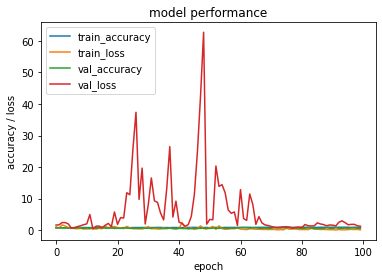

    epoch  accuracy     loss  val_accuracy  val_loss
12     12  0.826087  0.49134      0.857143  0.387763


In [45]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 5
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 6

In [46]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (185, 2)
val shape: (20, 2)
Found 185 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.7946
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_6_model.h5
6/6 [==============================] - 22s 4s/step - loss: 0.6645 - accuracy: 0.7946 - val_loss: 14.5175 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.7459
Epoch 2: val_accuracy improved from 0.50000 to 0.80000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_6_model.h5
6/6 [==============================] - 12s 2s/step - loss: 1.1357 - accuracy: 0.7459 - val_loss: 1.7555 - val_accuracy: 0.8000
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.8595
Epoch 3: val_accuracy did not improve from 0.80000
6/

###EVAL

Found 21 validated image filenames belonging to 2 classes.


1/1 [==============================] - 0s 435ms/step
Predict  0        1        
Actual
0        8        1        

1        2        10       





Overall Statistics : 

95% CI                                                            (0.70748,1.00681)
ACC Macro                                                         0.85714
ARI                                                               0.48501
AUNP                                                              0.86111
AUNU                                                              0.86111
Bangdiwala B                                                      0.73874
Bennett S                                                         0.71429
CBA                                                               0.81667
CSI                                                               0.71566
Chi-Squared                                                       10.75455
Chi-Squared DF                                                    1
Conditio

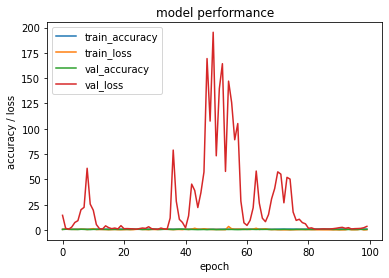

    epoch  accuracy      loss  val_accuracy  val_loss
39     39  0.881081  0.373772          0.85  7.477904


In [47]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 6
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 7

In [61]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (185, 2)
val shape: (20, 2)
Found 185 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 7.5923 - accuracy: 0.4919
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_7_model.h5
6/6 [==============================] - 15s 2s/step - loss: 7.5923 - accuracy: 0.4919 - val_loss: 0.6921 - val_accuracy: 0.5500
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 5.6014 - accuracy: 0.5676
Epoch 2: val_accuracy did not improve from 0.55000
6/6 [==============================] - 4s 647ms/step - loss: 5.6014 - accuracy: 0.5676 - val_loss: 0.6880 - val_accuracy: 0.5500
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 2.9775 - accuracy: 0.6000
Epoch 3: val_accuracy did not improve from 0.55000
6/6 [==============================] - 4s 672ms/step - loss: 2.9775 - accuracy

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 379ms/step
Predict 0       1       
Actual
0       5       4       

1       3       9       





Overall Statistics : 

95% CI                                                            (0.46504,0.86829)
ACC Macro                                                         0.66667
ARI                                                               0.06692
AUNP                                                              0.65278
AUNU                                                              0.65278
Bangdiwala B                                                      0.46491
Bennett S                                                         0.33333
CBA                                                               0.62393
CSI                                                               0.31143
Chi-Squared                                                       2.03606
Chi-Squared DF             

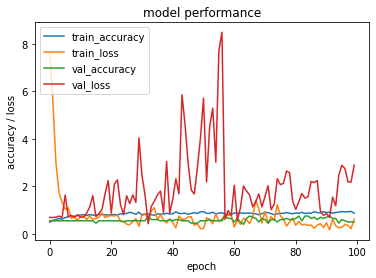

    epoch  accuracy      loss  val_accuracy  val_loss
32     32  0.837838  0.595998          0.75  0.427537


In [62]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 7
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 8

In [63]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (185, 2)
val shape: (20, 2)
Found 185 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.2380 - accuracy: 0.7459
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_8_model.h5
6/6 [==============================] - 14s 2s/step - loss: 1.2380 - accuracy: 0.7459 - val_loss: 2.7373 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.2978 - accuracy: 0.7027
Epoch 2: val_accuracy improved from 0.50000 to 0.55000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_8_model.h5
6/6 [==============================] - 11s 2s/step - loss: 1.2978 - accuracy: 0.7027 - val_loss: 1.0194 - val_accuracy: 0.5500
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.1690 - accuracy: 0.6973
Epoch 3: val_accuracy improved from 0.55000 to 0.60000

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 400ms/step
Predict  0        1        
Actual
0        7        2        

1        2        10       





Overall Statistics : 

95% CI                                                            (0.64157,0.97747)
ACC Macro                                                         0.80952
ARI                                                               0.35185
AUNP                                                              0.80556
AUNU                                                              0.80556
Bangdiwala B                                                      0.66222
Bennett S                                                         0.61905
CBA                                                               0.80556
CSI                                                               0.61111
Chi-Squared                                                       7.84259
Chi-Squared DF    

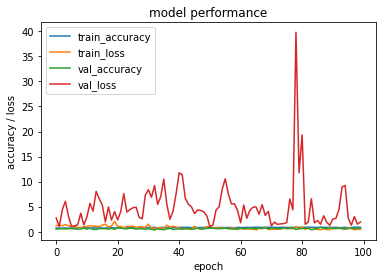

    epoch  accuracy      loss  val_accuracy  val_loss
86     86  0.881081  0.385062           0.9  1.472209


In [64]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 8
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 9

In [65]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (185, 2)
val shape: (20, 2)
Found 185 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.1731 - accuracy: 0.7730
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_9_model.h5
6/6 [==============================] - 14s 2s/step - loss: 1.1731 - accuracy: 0.7730 - val_loss: 0.7755 - val_accuracy: 0.7000
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.7838
Epoch 2: val_accuracy improved from 0.70000 to 0.80000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_9_model.h5
6/6 [==============================] - 12s 2s/step - loss: 1.0718 - accuracy: 0.7838 - val_loss: 0.6785 - val_accuracy: 0.8000
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.7261 - accuracy: 0.7676
Epoch 3: val_accuracy did not improve from 0.80000
6/6

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 404ms/step
Predict 0       1       
Actual
0       8       1       

1       7       5       





Overall Statistics : 

95% CI                                                            (0.41134,0.82675)
ACC Macro                                                         0.61905
ARI                                                               0.01355
AUNP                                                              0.65278
AUNU                                                              0.65278
Bangdiwala B                                                      0.42995
Bennett S                                                         0.2381
CBA                                                               0.475
CSI                                                               0.33611
Chi-Squared                                                       2.35278
Chi-Squared DF                

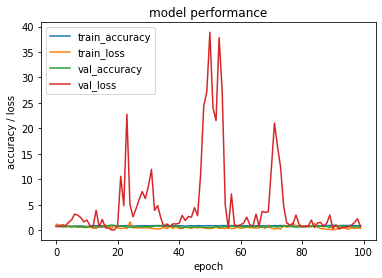

    epoch  accuracy      loss  val_accuracy  val_loss
18     18   0.87027  0.355473           1.0   0.05432


In [66]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 9
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKENARIO 10

In [67]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (185, 2)
val shape: (20, 2)
Found 185 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.8432
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to /content/drive/MyDrive/uji_Shams/Model/_fold_10_model.h5
6/6 [==============================] - 14s 2s/step - loss: 0.6485 - accuracy: 0.8432 - val_loss: 0.7544 - val_accuracy: 0.8000
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.6745 - accuracy: 0.8108
Epoch 2: val_accuracy did not improve from 0.80000
6/6 [==============================] - 5s 684ms/step - loss: 0.6745 - accuracy: 0.8108 - val_loss: 1.1807 - val_accuracy: 0.7000
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.8634 - accuracy: 0.7568
Epoch 3: val_accuracy did not improve from 0.80000
6/6 [==============================] - 4s 689ms/step - loss: 0.8634 - accurac

###EVAL

Found 21 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 395ms/step
Predict  0        1        
Actual
0        7        2        

1        0        12       





Overall Statistics : 

95% CI                                                            (0.77921,1.03031)
ACC Macro                                                         0.90476
ARI                                                               0.63878
AUNP                                                              0.88889
AUNU                                                              0.88889
Bangdiwala B                                                      0.8355
Bennett S                                                         0.80952
CBA                                                               0.81746
CSI                                                               0.81746
Chi-Squared                                                       14.0
Chi-Squared DF        

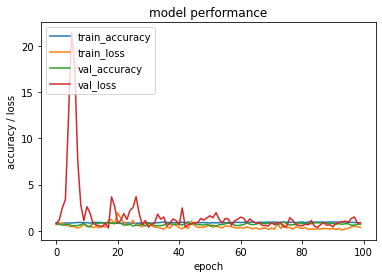

    epoch  accuracy      loss  val_accuracy  val_loss
74     74  0.918919  0.642506          0.95  0.389512


In [68]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 10
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

#HASIL KESELURUHAN 10-SKENARIO

In [69]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/uji_Shams/' +"Model/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

,epoch,accuracy,loss,val_accuracy,val_loss
1,94.000000,0.777174,0.769416,0.809524,0.769766
2,26.000000,0.804348,0.576445,0.952381,1.082521
3,78.000000,0.934783,1.190211,0.714286,3.998468
4,76.000000,0.896739,0.882123,0.714286,2.003833
5,12.000000,0.826087,0.491340,0.857143,0.387763
6,39.000000,0.881081,0.373772,0.850000,7.477904
7,32.000000,0.837838,0.595998,0.750000,0.427537
8,86.000000,0.881081,0.385062,0.900000,1.472209
9,18.000000,0.870270,0.355473,1.000000,0.054320
10,74.000000,0.918919,0.642506,0.950000,0.389512


#PENGUJIAN UNSEEN DATA

##SKENARIO 1

In [70]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '1' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       
Actual
0       6       2       

1       6       9       





Overall Statistics : 

95% CI                                                            (0.45752,0.84682)
ACC Macro                                                         0.65217
ARI                                                               0.0535
AUNP                                                              0.675
AUNU                                                              0.675
Bangdiwala B                                                      0.44828
Bennett S                                                         0.30435
CBA                                                               0.55
CSI                                                               0.33409
Chi-Squared                                                       2.56136
Chi-Squared DF                        

##SKENARIO 2

In [71]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 352ms/step
Predict 0       1       
Actual
0       6       2       

1       7       8       





Overall Statistics : 

95% CI                                                            (0.40924,0.80815)
ACC Macro                                                         0.6087
ARI                                                               0.00537
AUNP                                                              0.64167
AUNU                                                              0.64167
Bangdiwala B                                                      0.3937
Bennett S                                                         0.21739
CBA                                                               0.49744
CSI                                                               0.27244
Chi-Squared                                                       1.70436
Chi-Squared DF               

##SKENARIO 3

In [72]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '3' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 0s 354ms/step
Predict  0        1        
Actual
0        4        4        

1        10       5        





Overall Statistics : 

95% CI                                                            (0.19185,0.59076)
ACC Macro                                                         0.3913
ARI                                                               0.00375
AUNP                                                              0.41667
AUNU                                                              0.41667
Bangdiwala B                                                      0.16599
Bennett S                                                         -0.21739
CBA                                                               0.30952
CSI                                                               -0.1627
Chi-Squared                                                       0.60847
Chi-Squared DF    

##SKENARIO 4

In [12]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '4' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 16s 16s/step
Predict  0        1        
Actual
0        5        3        

1        3        12       





Overall Statistics : 

95% CI                                                            (0.55967,0.91859)
ACC Macro                                                         0.73913
ARI                                                               0.19154
AUNP                                                              0.7125
AUNU                                                              0.7125
Bangdiwala B                                                      0.58478
Bennett S                                                         0.47826
CBA                                                               0.7125
CSI                                                               0.425
Chi-Squared                                                       4.15438
Chi-Squared DF          

##SKENARIO 5

In [13]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '5' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 17s 17s/step
Predict  0        1        
Actual
0        6        2        

1        5        10       





Overall Statistics : 

95% CI                                                            (0.5076,0.8837)
ACC Macro                                                         0.69565
ARI                                                               0.1166
AUNP                                                              0.70833
AUNU                                                              0.70833
Bangdiwala B                                                      0.50746
Bennett S                                                         0.3913
CBA                                                               0.60606
CSI                                                               0.39773
Chi-Squared                                                       3.63005
Chi-Squared DF         

##SKENARIO 6

In [14]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '6' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 18s 18s/step
Predict 0       1       
Actual
0       7       1       

1       8       7       





Overall Statistics : 

95% CI                                                            (0.40924,0.80815)
ACC Macro                                                         0.6087
ARI                                                               0.00132
AUNP                                                              0.67083
AUNU                                                              0.67083
Bangdiwala B                                                      0.40833
Bennett S                                                         0.21739
CBA                                                               0.46667
CSI                                                               0.34167
Chi-Squared                                                       2.68493
Chi-Squared DF               

##SKENARIO 7

In [15]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '7' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 17s 17s/step
Predict 0       1       
Actual
0       4       4       

1       6       9       





Overall Statistics : 

95% CI                                                            (0.36262,0.76782)
ACC Macro                                                         0.56522
ARI                                                               -0.02621
AUNP                                                              0.55
AUNU                                                              0.55
Bangdiwala B                                                      0.35273
Bennett S                                                         0.13043
CBA                                                               0.5
CSI                                                               0.09615
Chi-Squared                                                       0.21231
Chi-Squared DF                       

##SKENARIO 8

In [16]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '8' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.


1/1 [==============================] - 16s 16s/step
Predict  0        1        
Actual
0        5        3        

1        4        11       





Overall Statistics : 

95% CI                                                            (0.5076,0.8837)
ACC Macro                                                         0.69565
ARI                                                               0.11444
AUNP                                                              0.67917
AUNU                                                              0.67917
Bangdiwala B                                                      0.51773
Bennett S                                                         0.3913
CBA                                                               0.64444
CSI                                                               0.3498
Chi-Squared                                                       2.81263
Chi-Squared DF                                                    1
Conditional En

##SKENARIO 9

In [17]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '9' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.


1/1 [==============================] - 17s 17s/step
Predict 0       1       
Actual
0       6       2       

1       7       8       





Overall Statistics : 

95% CI                                                            (0.40924,0.80815)
ACC Macro                                                         0.6087
ARI                                                               0.00537
AUNP                                                              0.64167
AUNU                                                              0.64167
Bangdiwala B                                                      0.3937
Bennett S                                                         0.21739
CBA                                                               0.49744
CSI                                                               0.27244
Chi-Squared                                                       1.70436
Chi-Squared DF                                                    1
Conditional Entropy  

##SKENARIO 10

In [18]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '10' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 23 validated image filenames belonging to 2 classes.
1/1 [==============================] - 16s 16s/step
Predict  0        1        
Actual
0        6        2        

1        4        11       





Overall Statistics : 

95% CI                                                            (0.55967,0.91859)
ACC Macro                                                         0.73913
ARI                                                               0.19482
AUNP                                                              0.74167
AUNU                                                              0.74167
Bangdiwala B                                                      0.57091
Bennett S                                                         0.47826
CBA                                                               0.66667
CSI                                                               0.46474
Chi-Squared                                                       4.95974
Chi-Squared DF     

#UJI COBA KLASIFIKASI OTHERS

1/1 [==============================] - 2s 2s/step
prediction is Others


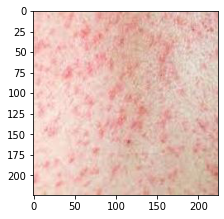

In [14]:
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '4' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/uji_Shams/Dataset/Others/NM04_01.jpg')

#UJI COBA KLASIFIKASI KELAS MONKEYPOX

1/1 [==============================] - 1s 1s/step
prediction is Monkeypox


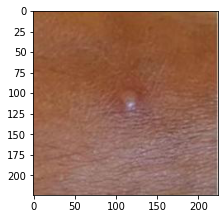

In [16]:
model_filepath =  '/content/drive/MyDrive/uji_Shams/' + "Model/" + '_fold_' + '4' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/uji_Shams/Dataset/Monkeypox/M11_01.jpg')